In [1]:
from app.Deep_Learning.DataPredict import Predictor
from app.Deep_Learning.OutdoorFusionDataset import Data
import matplotlib.pyplot as plt

# Preparing Mock data and activating the predictor

In [2]:
path = 'orderquantity_data.pth'

datasets = Data()
X, Y = datasets.getOrderQuantityXY()

predictor = Predictor(path, X.columns)

In [3]:
mock_data = {
    "Country": "CANADA",
    "Product": "Guaraná Fantástica",
    "Category": "Foodstuff",
    "SubCategory": "Beverages"
}

In [4]:
values = datasets.getMonthValues(mock_data)

# Predicting the values

In [5]:
predictColumn = 'Predicted_Quantity'
predictedValue = await predictor.predict(values, predictColumn)

In [6]:
result_df = predictedValue[['DAY_MONTH_nr', predictColumn]]
result_df

,DAY_MONTH_nr,Predicted_Quantity
0,1,15.556688
1,2,16.552572
2,3,15.589300
3,4,16.713739
4,5,17.081387
5,6,15.863253
6,7,16.763674
7,8,16.217505
8,9,15.684309
9,10,17.286966


# Displaying the results

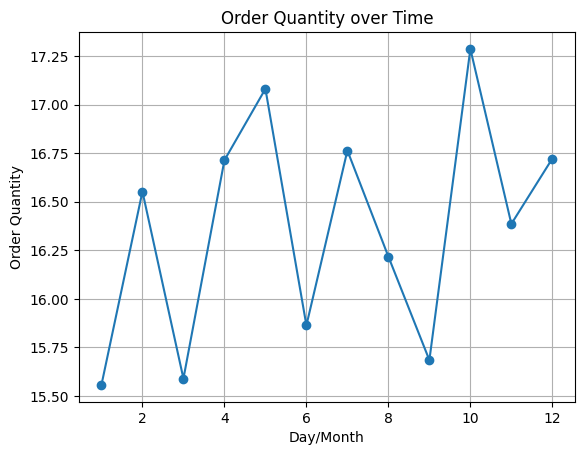

In [7]:
# Sorting the dataframe by 'DAY_MONTH_nr' to ensure the graph is plotted in chronological order
result_df = result_df.sort_values('DAY_MONTH_nr')

# Extracting the relevant columns for plotting
order_quantity = result_df[predictColumn]
day_month_nr = result_df['DAY_MONTH_nr']

# Plotting the line graph
plt.plot(day_month_nr, order_quantity, marker='o')
plt.xlabel('Day/Month')
plt.ylabel('Order Quantity')
plt.title('Order Quantity over Time')
plt.grid(True)
plt.show()